In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
from scipy.stats.stats import ttest_ind
from scipy.stats import boxcox
import warnings

from scipy.stats import jarque_bera
from scipy.stats import normaltest

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('select * from studentsperformance',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
df['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [7]:
df['lunch'].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

In [8]:
df['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

In [9]:
df['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

In [10]:
df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

1. Are the exam score variables distributed normally? If not, apply Box-Cox transformation. Does anything change?

In [11]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [12]:
df['math score'].sort_values()

59       0
980      8
17      18
787     19
145     22
842     23
338     24
466     26
91      27
363     27
327     28
683     29
528     29
602     29
76      30
597     30
785     32
895     32
555     32
55      33
217     34
902     34
921     35
339     35
211     35
777     35
621     35
527     36
896     36
617     37
      ... 
501     94
815     94
685     94
171     94
613     94
950     94
503     95
619     95
717     96
165     96
563     96
34      97
864     97
286     97
179     97
855     97
539     97
104     98
934     98
712     98
306     99
114     99
263     99
916    100
458    100
626    100
624    100
451    100
962    100
149    100
Name: math score, Length: 1000, dtype: int64

In [13]:
df['reading score'].sort_values()

59      17
327     23
597     24
980     24
76      26
211     28
602     29
896     29
466     31
810     31
17      32
895     34
363     34
91      34
706     34
66      37
131     37
331     37
338     38
787     38
145     39
555     39
729     39
424     39
61      39
84      39
683     40
296     41
978     41
204     41
      ... 
229     95
717     96
919     96
572     96
624     96
373     97
514     97
626     97
855     97
581     97
995     99
685     99
403     99
149    100
546    100
165    100
886    100
957    100
903    100
916    100
567    100
114    100
712    100
381    100
970    100
106    100
595    100
962    100
179    100
458    100
Name: reading score, Length: 1000, dtype: int64

In [14]:
df['writing score'].sort_values()

59      10
597     15
327     19
76      22
980     23
338     27
896     27
211     27
17      28
602     30
363     32
787     32
555     33
145     33
84      34
424     34
61      34
331     35
842     36
91      36
810     36
706     36
729     37
66      37
862     38
33      38
617     38
466     38
75      38
895     38
      ... 
334     95
995     95
886     95
268     95
941     96
855     96
373     96
581     96
546     97
451     97
110     98
652     98
626     99
595     99
712     99
717     99
567    100
962    100
377    100
165    100
403    100
685    100
458    100
903    100
179    100
970    100
106    100
957    100
916    100
114    100
Name: writing score, Length: 1000, dtype: int64

In [18]:
# removing row with 0 in math score. transforming requires positive values
df = df.drop(df.index[59])

In [19]:
df['math score'].sort_values()

980      8
17      18
787     19
145     22
842     23
338     24
466     26
91      27
363     27
327     28
683     29
528     29
602     29
76      30
597     30
555     32
895     32
785     32
55      33
902     34
217     34
339     35
777     35
211     35
621     35
921     35
527     36
896     36
741     37
617     37
      ... 
613     94
501     94
685     94
950     94
815     94
779     94
619     95
503     95
717     96
563     96
165     96
864     97
286     97
539     97
855     97
179     97
34      97
934     98
712     98
104     98
114     99
263     99
306     99
916    100
149    100
624    100
626    100
962    100
451    100
458    100
Name: math score, Length: 999, dtype: int64

Are the exam score variables normally distributed? If not, apply a Box-Cox transformation. Does anything change?

ANSWER: Distribution of scores were somewhat normal but skewed left. Box-Cox appeared to normalize them as p values are all lower than 0.05. 

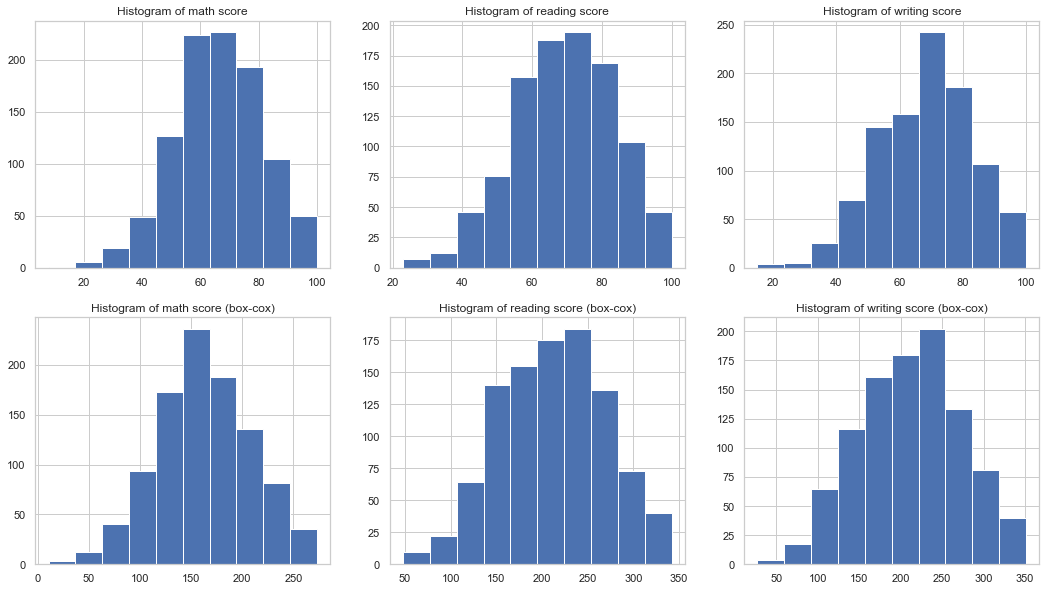

In [22]:
math_boxcox,_ = boxcox(df["math score"])
reading_boxcox,_ = boxcox(df["reading score"])
writing_boxcox,_ = boxcox(df["writing score"])

plt.figure(figsize=(18,10))

plt.subplot(2, 3, 1)
plt.hist(df["math score"])
plt.title("Histogram of math score")

plt.subplot(2, 3, 2)
plt.hist(df["reading score"])
plt.title("Histogram of reading score")

plt.subplot(2, 3, 3)
plt.hist(df["writing score"])
plt.title("Histogram of writing score")

plt.subplot(2, 3, 4)
plt.hist(math_boxcox)
plt.title("Histogram of math score (box-cox)")

plt.subplot(2, 3, 5)
plt.hist(reading_boxcox)
plt.title("Histogram of reading score (box-cox)")

plt.subplot(2, 3, 6)
plt.hist(writing_boxcox)
plt.title("Histogram of writing score (box-cox)")

plt.show()

In [25]:
jb_stats = jarque_bera(df["math score"])
norm_stats = normaltest(df["math score"])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(df["reading score"])
norm_stats = normaltest(df["reading score"])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(df["writing score"])
norm_stats = normaltest(df["writing score"])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 7.67308445764244 and p value is 0.02156804993927408
Normality test statistics is 7.661032525153008 and p value is 0.021698410660350678
Jarque-Bera test statistics is 9.776353497445086 and p value is 0.007535148427256777
Normality test statistics is 9.673376920700841 and p value is 0.007933281978037242
Jarque-Bera test statistics is 11.587461259316736 and p value is 0.003046595230866145
Normality test statistics is 11.43053575430092 and p value is 0.0032952676764974485


2. Say, we want to use a single variable for the exam scores as our target. For this purpose, create a new variable by taking a weighted average of the exam scores. Check whether this new variable is normally distributed or not. If it's not normally distributed, apply Box-Cox transformation and check whether the transformed variable is normally distributed.

ANSWER: The newly created variable was almost normally distributed but skewed left. The Box-Cox transformed the variable to be much more normally distributed. 

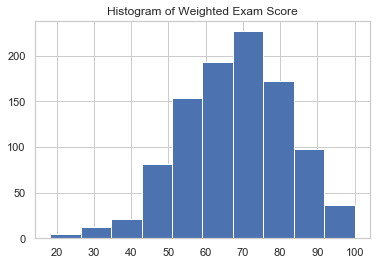

Jarque-Bera test statistics is 10.345394363749879 and p value is 0.0056692571616785425
Normality test statistics is 10.127189207749474 and p value is 0.006322790687068094


In [27]:
weighted_exam_score = (df["math score"] + df["reading score"] + df["writing score"])/3

plt.hist(weighted_exam_score)
plt.title("Histogram of Weighted Exam Score")
plt.show()

jb_stats = jarque_bera(exam_score)
norm_stats = normaltest(exam_score)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

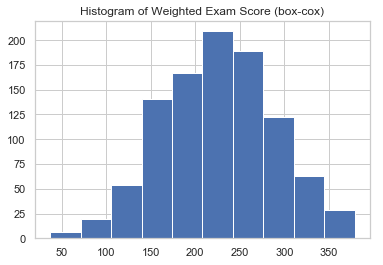

Jarque-Bera test statistics is 3.4323846909111793 and p value is 0.17974926966382276
Normality test statistics is 4.219879978703656 and p value is 0.12124524222064059


In [28]:
exams_boxcox,_ = boxcox(weighted_exam_score)

plt.hist(exams_boxcox)
plt.title("Histogram of Weighted Exam Score (box-cox)")
plt.show()

jb_stats = jarque_bera(exams_boxcox)
norm_stats = normaltest(exams_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

3. Which variables do seem to be related with the target variable (the newly created variable in the previous question)? If our goal is to explain the determinants of the success in the exams, which variables in our dataset might be useful?

ANSWER:  Females in group E who have parents with a bachelors or masters and who have a standard lunch and completed the prep course seem to have higher test scores. 

In [29]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [ ]:
X = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

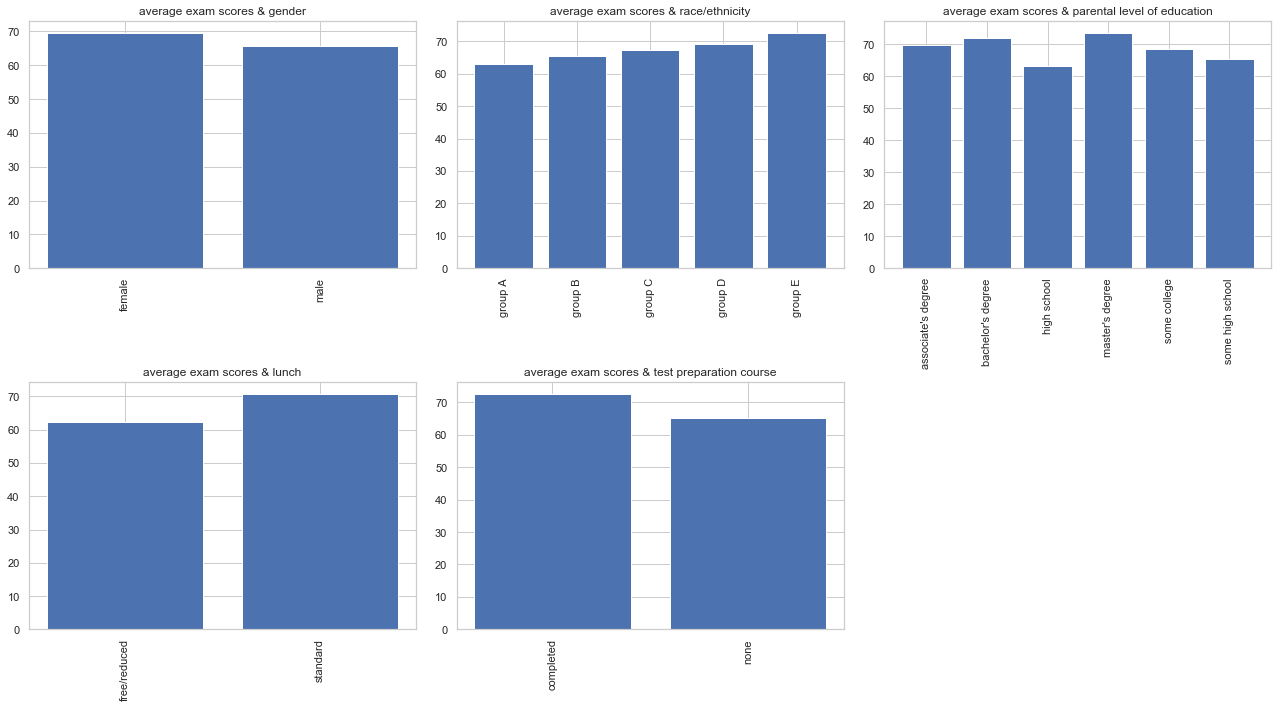

In [31]:
df["weighted_exam_score"] = exam_score

plt.figure(figsize=(18, 10))

plt.subplot(2, 3, 1)
plt.bar(df.groupby("gender")
        ["weighted_exam_score"].mean().index, df.groupby("gender")["weighted_exam_score"].mean())

plt.title("average exam scores & gender")
plt.xticks(rotation="vertical")

plt.subplot(2, 3, 2)
plt.bar(df.groupby("race/ethnicity")
        ["weighted_exam_score"].mean().index, df.groupby("race/ethnicity")["weighted_exam_score"].mean())

plt.title("average exam scores & race/ethnicity")
plt.xticks(rotation="vertical")

plt.subplot(2, 3, 3)
plt.bar(df.groupby("parental level of education")
        ["weighted_exam_score"].mean().index, df.groupby("parental level of education")["weighted_exam_score"].mean())

plt.title("average exam scores & parental level of education")
plt.xticks(rotation="vertical")

plt.subplot(2, 3, 4)
plt.bar(df.groupby("lunch")
        ["weighted_exam_score"].mean().index, df.groupby("lunch")["weighted_exam_score"].mean())

plt.title("average exam scores & lunch")
plt.xticks(rotation="vertical")

plt.subplot(2, 3, 5)
plt.bar(df.groupby("test preparation course")
        ["weighted_exam_score"].mean().index, df.groupby("test preparation course")["weighted_exam_score"].mean())

plt.title("average exam scores & test preparation course")
plt.xticks(rotation="vertical")

plt.tight_layout()
plt.show()